## Walk-through of key functionalities
We'll do a quick overview of the key pieces of fastai's training modules. See the separate module docs for details on each.
#### Setup
Import required modules and prepare data:

In [10]:
from fastai.vision import *
from fastai.basics import *
from fastai.callbacks import *

path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)

`URLs.MNIST_SAMPLE`is a small subset of the classic MNIST dataset containing the images of just 3's and 7's for the purpose of demo and documentation here. Common `datasets` can be downloaded with `untar_data` - which we will use to create an `ImageDataBunch` object

### Basic training with Learner
We can create a minimal CNN using `simple_cnn` (see models for details on creating models):

In [2]:
model = simple_cnn((3,16,16,2))

The Learner class plays a central role in training models; when you create a Learner you need to specify at the very minimum the data and model to use.

In [3]:
learn = Learner(data, model)

These are enough to create a Learner object and then use it to train a model using its fit method. If you have a CUDA-enabled GPU, it will be used automatically. To call the fit method, you have to at least specify how many epochs to train for.

In [4]:
learn.fit(1)

epoch,train_loss,valid_loss,time
0,0.124707,0.102193,01:00


### Viewing metrics
To see how our training is going, we can request that it reports various kinds of metrics after each epoch. You can pass it to the constructor, or set it later. Note that metrics are always calculated on the validation set.

In [5]:
learn.metrics=[accuracy]
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.086313,0.077329,0.971541,01:00


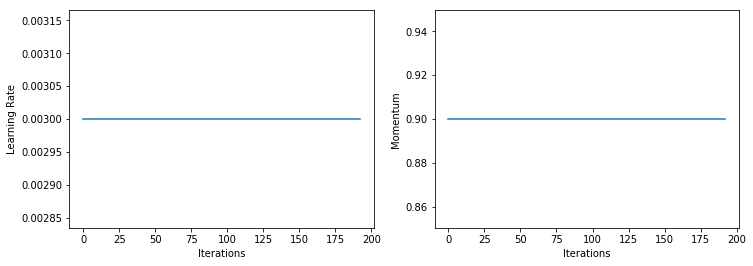

In [6]:
learn.recorder.plot_lr(show_moms=True)

### Extending training with callbacks
You can use callbacks to modify training in almost any way you can imagine. For instance, we've provided a callback to implement Leslie Smith's 1cycle training method.

In [ ]:
cb = OneCycleScheduler(learn, lr_max=0.01)
learn.fit(1, callbacks=cb)

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.recorder.plot_lr(show_moms=True)

### Extending Learner with train
Many of the callbacks can be used more easily by taking advantage of the Learner extensions in train. For instance, instead of creating OneCycleScheduler manually as above, you can simply call Learner.fit_one_cycle:

In [8]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.064075,0.056729,0.979882,00:59


## Applications
For instance, let's use cnn_learner (from vision) to quickly fine-tune a pre-trained Imagenet model for MNIST (not a very practical approach, of course, since MNIST is handwriting and our model is pre-trained on photos!).

In [9]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\Yang/.cache\torch\checkpoints\resnet18-5c106cde.pth
100%|█████████████████████████████████████████████████████████████████| 46827520/46827520 [00:07<00:00, 6159350.40it/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.186089,0.109134,0.964181,01:20
